<a href="https://colab.research.google.com/github/DrMuzi/Belajar-Machine-Learning/blob/main/152236035100_616.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge

In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install pytest-shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Libraries
import pandas as pd
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

## Dataset

In [ ]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-06-22 03:07:26--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.217.197.97
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.217.197.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  14.2MB/s    in 5.1s    

2022-06-22 03:07:32 (11.1 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-06-22 03:07:32--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 52.216.43.41
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|52.216.43.41|:443... connec

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [ ]:
# The train label dataset is already loaded below
data = pd.read_csv("train_labels.csv")

In [ ]:
data.head()

,file,label
0,img_44733.jpg,1.0
1,img_72999.jpg,1.0
2,img_25094.jpg,1.0
3,img_69092.jpg,1.0
4,img_92629.jpg,1.0


## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [ ]:
# Declare variable for files

train_0_dir = os.path.join('./train/0')
train_1_dir = os.path.join('./train/1')
test_dir = os.path.join('./test')

In [ ]:
train_0_names = os.listdir(train_0_dir)
print(train_0_names[:10])

train_1_names = os.listdir(train_1_dir)
print(train_1_names[:10])

['img_7075.jpg', 'img_1286.jpg', 'img_74494.jpg', 'img_34413.jpg', 'img_33742.jpg', 'img_14783.jpg', 'img_11763.jpg', 'img_8845.jpg', 'img_45937.jpg', 'img_60336.jpg']
['img_68227.jpg', 'img_102087.jpg', 'img_46190.jpg', 'img_14970.jpg', 'img_14634.jpg', 'img_65547.jpg', 'img_59237.jpg', 'img_54851.jpg', 'img_29340.jpg', 'img_25865.jpg']


In [ ]:
# Data lengths

print('total training 0 images:', len(os.listdir(train_0_dir)))
print('total training 1 images:', len(os.listdir(train_1_dir)))
print('total test images:', len(os.listdir(test_dir)))

total training 0 images: 2026
total training 1 images: 1989
total test images: 1401


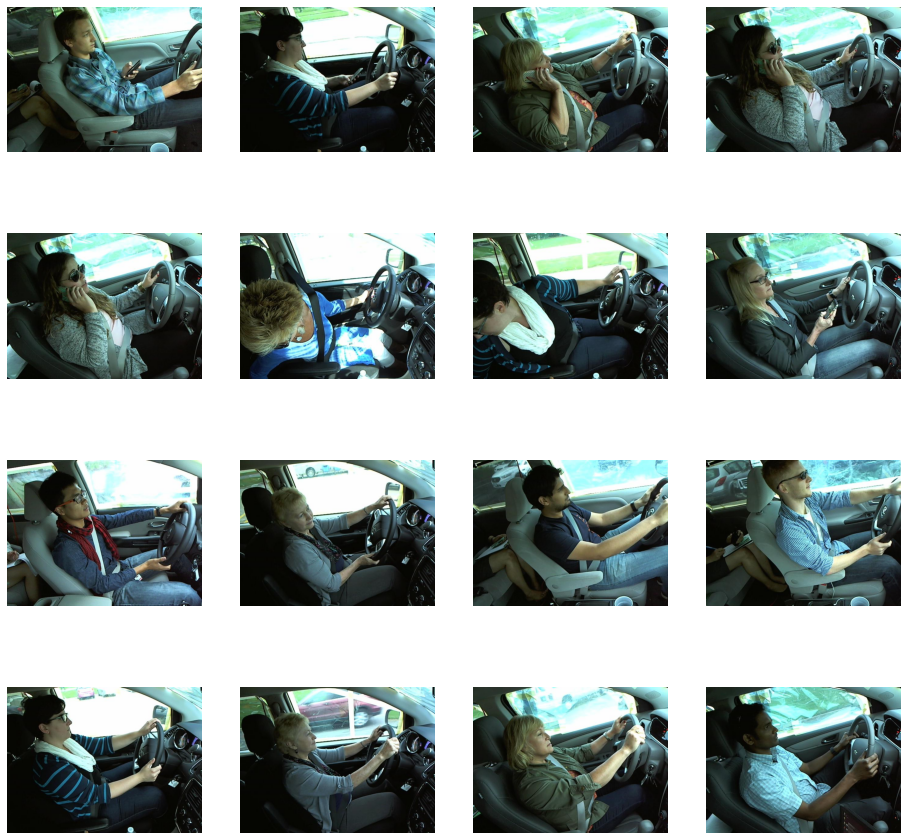

In [ ]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(train_0_dir, fname) 
                for fname in train_0_names[pic_index-8:pic_index]]
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_0_pix+next_1_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [ ]:
# Create Model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ])

In [ ]:
# Gets the summary of the learning

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model with Adam

model.compile(optimizer=Adam(learning_rate=0.0002), loss="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Preprocess Data

train_generator = train_datagen.flow_from_directory(
    "./train",
    target_size=(150,150),
    batch_size = 32,
    class_mode = "binary",
    subset = 'training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    "./train",
    target_size=(150,150),
    batch_size = 8,
    class_mode = "binary",
    subset = 'validation',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    '.', classes=['test']
)

Found 2812 images belonging to 2 classes.
Found 1203 images belonging to 2 classes.
Found 1400 images belonging to 1 classes.


In [ ]:
# Fit model

history = model.fit(
    train_generator, 
    validation_data = val_generator,
    epochs=15, 
    steps_per_epoch = 64,
    validation_steps = 64,
    verbose = 1,
    callbacks = [callback])

Epoch 1/15
64/64 [==============================] - 81s 1s/step - loss: 0.5949 - accuracy: 0.6714 - val_loss: 0.4222 - val_accuracy: 0.8125
Epoch 2/15
64/64 [==============================] - 58s 900ms/step - loss: 0.3223 - accuracy: 0.8687 - val_loss: 0.2348 - val_accuracy: 0.9238
Epoch 3/15
64/64 [==============================] - 57s 896ms/step - loss: 0.1540 - accuracy: 0.9437 - val_loss: 0.1447 - val_accuracy: 0.9531
Epoch 4/15
64/64 [==============================] - 57s 896ms/step - loss: 0.0744 - accuracy: 0.9799 - val_loss: 0.1190 - val_accuracy: 0.9707
Epoch 5/15
64/64 [==============================] - 58s 900ms/step - loss: 0.0483 - accuracy: 0.9839 - val_loss: 0.1071 - val_accuracy: 0.9688
Epoch 6/15
64/64 [==============================] - 58s 904ms/step - loss: 0.0386 - accuracy: 0.9858 - val_loss: 0.0715 - val_accuracy: 0.9785
Epoch 7/15
64/64 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9932
Reached 99% accuracy so cancelling training!
64/64 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

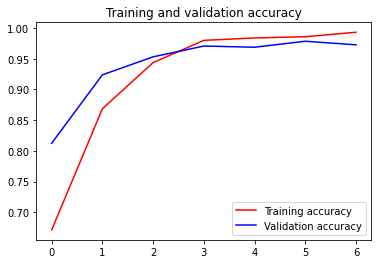

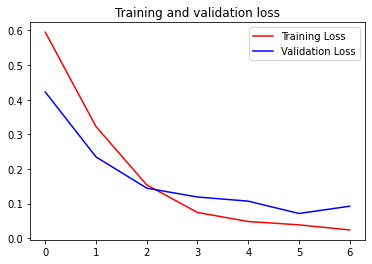

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each image in the test folder, predict the value of the label (0/1). You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **file**
   - **label**
   

In [ ]:
test_names = os.listdir(test_dir)
print(test_names[:10])

['img_74470.jpg', 'img_85888.jpg', 'img_61131.jpg', 'img_42295.jpg', 'img_69063.jpg', 'img_616.jpg', 'img_73704.jpg', 'img_75773.jpg', 'img_41336.jpg', 'img_5593.jpg']


In [ ]:
import numpy as np
from keras.preprocessing import image


pred_class=[]

for fn in test_names:  
  # predicting images  
  try:
    path = '/content/test/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x / 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)  
    if classes[0]>0.5:
      pred_class.append(1)
    else:
      pred_class.append(0)
  except:
    pass

In [ ]:
import pandas as pd

file_test=os.listdir(test_dir)
label = np.array(pred_class)

submission_df = pd.DataFrame({'file': file_test, 'label': label}, columns=['file', 'label'])
print(submission_df)  
  
  

                file  label
0      img_74470.jpg      0
1      img_85888.jpg      1
2      img_61131.jpg      0
3      img_42295.jpg      1
4      img_69063.jpg      0
...              ...    ...
1395  img_101196.jpg      1
1396   img_73316.jpg      0
1397   img_97714.jpg      1
1398   img_39730.jpg      0
1399   img_66990.jpg      1

[1400 rows x 2 columns]


In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)